In [1]:
!python -m spacy download el_core_news_sm

     |████████████████████████████████| 11.4MB 29.3MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp37-none-any.whl size=11422785 sha256=47c67d5d803e7a3b42a6ae1fc8d613d35a13f78422b61cfe55a0f60c1126126d
  Stored in directory: /tmp/pip-ephem-wheel-cache-5fgj0197/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import re
from datetime import datetime
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [5]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [6]:

df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Scrape_dikaiologitika.csv") 
df

,Title,Summary,Time
0,\nΕΦΚΑ: Παράταση στην υποβολή αιτήσεων για το ...,\n ...,23/06/2021 - 19:54
1,\nΑδέσμευτη Φωνή Υπαλλήλων ΟΑΕΔ: Πάνω από 30.0...,\n ...,23/06/2021 - 12:14
2,\nΟΑΕΔ: Ξεκινάνε οι αιτήσεις για τα e-learning...,\n ...,23/06/2021 - 10:41
3,\nΒγαίνουν τα αποτελέσματα για τον κοινωνικό τ...,\n ...,23/06/2021 - 06:56
4,\n«ΣΥΝ-ΕΡΓΑΣΙΑ»: Πως θα καταβληθεί το επίδομα ...,\n ...,23/06/2021 - 06:39
...,...,...,...
1995,\nΣΥΝΕΡΓΑΣΙΑ: Αλλαγές στα κριτήρια των εργαζομ...,\n ...,31/05/2021 - 19:37
1996,\nΤηλεργασία: Επιστρέφουν στις δουλειές τους ο...,\n ...,31/05/2021 - 17:50
1997,\nΟΑΕΔ: Τα αποτελέσματα για το πρόγραμμα με τη...,\n ...,31/05/2021 - 15:07
1998,\nΌλες οι πληρωμές επιδομάτων και συντάξεων απ...,\n ...,30/05/2021 - 15:32


In [7]:
df['Time'] = pd.to_datetime(df.Time , format='%d/%m/%Y - %H:%M')
df['Time']
df

,Title,Summary,Time
0,\nΕΦΚΑ: Παράταση στην υποβολή αιτήσεων για το ...,\n ...,2021-06-23 19:54:00
1,\nΑδέσμευτη Φωνή Υπαλλήλων ΟΑΕΔ: Πάνω από 30.0...,\n ...,2021-06-23 12:14:00
2,\nΟΑΕΔ: Ξεκινάνε οι αιτήσεις για τα e-learning...,\n ...,2021-06-23 10:41:00
3,\nΒγαίνουν τα αποτελέσματα για τον κοινωνικό τ...,\n ...,2021-06-23 06:56:00
4,\n«ΣΥΝ-ΕΡΓΑΣΙΑ»: Πως θα καταβληθεί το επίδομα ...,\n ...,2021-06-23 06:39:00
...,...,...,...
1995,\nΣΥΝΕΡΓΑΣΙΑ: Αλλαγές στα κριτήρια των εργαζομ...,\n ...,2021-05-31 19:37:00
1996,\nΤηλεργασία: Επιστρέφουν στις δουλειές τους ο...,\n ...,2021-05-31 17:50:00
1997,\nΟΑΕΔ: Τα αποτελέσματα για το πρόγραμμα με τη...,\n ...,2021-05-31 15:07:00
1998,\nΌλες οι πληρωμές επιδομάτων και συντάξεων απ...,\n ...,2021-05-30 15:32:00


In [8]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df['day'] = pd.DatetimeIndex(df['Time']).day
df

,Title,Summary,Time,year,month,day
0,\nΕΦΚΑ: Παράταση στην υποβολή αιτήσεων για το ...,\n ...,2021-06-23 19:54:00,2021,6,23
1,\nΑδέσμευτη Φωνή Υπαλλήλων ΟΑΕΔ: Πάνω από 30.0...,\n ...,2021-06-23 12:14:00,2021,6,23
2,\nΟΑΕΔ: Ξεκινάνε οι αιτήσεις για τα e-learning...,\n ...,2021-06-23 10:41:00,2021,6,23
3,\nΒγαίνουν τα αποτελέσματα για τον κοινωνικό τ...,\n ...,2021-06-23 06:56:00,2021,6,23
4,\n«ΣΥΝ-ΕΡΓΑΣΙΑ»: Πως θα καταβληθεί το επίδομα ...,\n ...,2021-06-23 06:39:00,2021,6,23
...,...,...,...,...,...,...
1995,\nΣΥΝΕΡΓΑΣΙΑ: Αλλαγές στα κριτήρια των εργαζομ...,\n ...,2021-05-31 19:37:00,2021,5,31
1996,\nΤηλεργασία: Επιστρέφουν στις δουλειές τους ο...,\n ...,2021-05-31 17:50:00,2021,5,31
1997,\nΟΑΕΔ: Τα αποτελέσματα για το πρόγραμμα με τη...,\n ...,2021-05-31 15:07:00,2021,5,31
1998,\nΌλες οι πληρωμές επιδομάτων και συντάξεων απ...,\n ...,2021-05-30 15:32:00,2021,5,30


In [9]:
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

In [10]:
df.dtypes

Title              object
Summary            object
Time       datetime64[ns]
year                int64
month              object
day                 int64
dtype: object

In [11]:
def cleanTxt(text):
  text = re.sub(r'[^\w\s]', '', text)   #Removing puncuations
  text = text.lower()                     #Converting letters to lowercase
  text = text.replace('\xa0','')       #Removing \xa0 character(it means space)  
  text = text.replace('\t','')        #Removing \t character(similar to the indentation function in the document,Tab key) 
  text = text.replace('\n','')
  text = text.replace('\r','')
  text = text.strip() 
  text = text.lower()                                                                                            
  #text = re.sub('\d+', '', text)      #Removing numbers             
# Return the cleaned text
  return text
#Clean the tweets
df['Summary'] = df['Summary'].apply(cleanTxt)
df['Title'] =  df['Title'].apply(cleanTxt)
#Show the cleaned tweets
df

,Title,Summary,Time,year,month,day
0,εφκα παράταση στην υποβολή αιτήσεων για το κατ...,η υποβολή των αιτήσεων γίνεται στην ιστοσελίδα...,2021-06-23 19:54:00,2021,Jun,23
1,αδέσμευτη φωνή υπαλλήλων οαεδ πάνω από 30000 δ...,η προθεσμία για τις αιτήσεις ένταξης στις ευνο...,2021-06-23 12:14:00,2021,Jun,23
2,οαεδ ξεκινάνε οι αιτήσεις για τα elearning κατ...,πρεμιέρα για τις αιτήσεις για τα elearning κατ...,2021-06-23 10:41:00,2021,Jun,23
3,βγαίνουν τα αποτελέσματα για τον κοινωνικό του...,μέσα στις επόμενες ημέρες ίσως και αυτή την εβ...,2021-06-23 06:56:00,2021,Jun,23
4,συνεργασια πως θα καταβληθεί το επίδομα αδείας...,ξεκινάει σήμερα και μέχρι την δευτέρα 28 ιουνί...,2021-06-23 06:39:00,2021,Jun,23
...,...,...,...,...,...,...
1995,συνεργασια αλλαγές στα κριτήρια των εργαζομένω...,ανακοινώθηκαν οι νέες προθεσμίες υποβολών αιτή...,2021-05-31 19:37:00,2021,May,31
1996,τηλεργασία επιστρέφουν στις δουλειές τους οι π...,στο 20 διαμορφώνεται το ποσοστό της τηλεργασία...,2021-05-31 17:50:00,2021,May,31
1997,οαεδ τα αποτελέσματα για το πρόγραμμα με τη cisco,αναρτήθηκαν σήμερα τα προσωρινά αποτελέσματα ω...,2021-05-31 15:07:00,2021,May,31
1998,όλες οι πληρωμές επιδομάτων και συντάξεων από ...,τι καταβάλλεται από υπουργείο εργασίας και κοι...,2021-05-30 15:32:00,2021,May,30


In [12]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [13]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [14]:
matrix = vec.fit_transform(df['Summary'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation(προσδοκία) words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']



In [17]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)


df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [18]:
#We don't have NaN values...
df.isnull().values.any()

False

In [19]:
df.set_index('Time' , inplace=True)
df



,Title,Summary,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,,,,
2021-06-23 19:54:00,εφκα παράταση στην υποβολή αιτήσεων για το κατ...,η υποβολή των αιτήσεων γίνεται στην ιστοσελίδα...,2021,Jun,23,0,0,0,0,0,0,0,0,0,0
2021-06-23 12:14:00,αδέσμευτη φωνή υπαλλήλων οαεδ πάνω από 30000 δ...,η προθεσμία για τις αιτήσεις ένταξης στις ευνο...,2021,Jun,23,0,0,0,0,0,0,0,0,0,0
2021-06-23 10:41:00,οαεδ ξεκινάνε οι αιτήσεις για τα elearning κατ...,πρεμιέρα για τις αιτήσεις για τα elearning κατ...,2021,Jun,23,0,2,0,0,0,0,0,0,0,1
2021-06-23 06:56:00,βγαίνουν τα αποτελέσματα για τον κοινωνικό του...,μέσα στις επόμενες ημέρες ίσως και αυτή την εβ...,2021,Jun,23,0,1,0,0,0,0,0,0,0,0
2021-06-23 06:39:00,συνεργασια πως θα καταβληθεί το επίδομα αδείας...,ξεκινάει σήμερα και μέχρι την δευτέρα 28 ιουνί...,2021,Jun,23,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31 19:37:00,συνεργασια αλλαγές στα κριτήρια των εργαζομένω...,ανακοινώθηκαν οι νέες προθεσμίες υποβολών αιτή...,2021,May,31,0,1,0,0,0,1,1,0,0,0
2021-05-31 17:50:00,τηλεργασία επιστρέφουν στις δουλειές τους οι π...,στο 20 διαμορφώνεται το ποσοστό της τηλεργασία...,2021,May,31,0,0,0,0,0,0,0,0,0,0
2021-05-31 15:07:00,οαεδ τα αποτελέσματα για το πρόγραμμα με τη cisco,αναρτήθηκαν σήμερα τα προσωρινά αποτελέσματα ω...,2021,May,31,0,0,0,0,0,0,1,0,0,0


In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/dikaiologitika_new_sent.csv' )
df

,Title,Summary,year,month,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,,,,
2021-06-23 19:54:00,εφκα παράταση στην υποβολή αιτήσεων για το κατ...,η υποβολή των αιτήσεων γίνεται στην ιστοσελίδα...,2021,Jun,23,0,0,0,0,0,0,0,0,0,0
2021-06-23 12:14:00,αδέσμευτη φωνή υπαλλήλων οαεδ πάνω από 30000 δ...,η προθεσμία για τις αιτήσεις ένταξης στις ευνο...,2021,Jun,23,0,0,0,0,0,0,0,0,0,0
2021-06-23 10:41:00,οαεδ ξεκινάνε οι αιτήσεις για τα elearning κατ...,πρεμιέρα για τις αιτήσεις για τα elearning κατ...,2021,Jun,23,0,2,0,0,0,0,0,0,0,1
2021-06-23 06:56:00,βγαίνουν τα αποτελέσματα για τον κοινωνικό του...,μέσα στις επόμενες ημέρες ίσως και αυτή την εβ...,2021,Jun,23,0,1,0,0,0,0,0,0,0,0
2021-06-23 06:39:00,συνεργασια πως θα καταβληθεί το επίδομα αδείας...,ξεκινάει σήμερα και μέχρι την δευτέρα 28 ιουνί...,2021,Jun,23,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31 19:37:00,συνεργασια αλλαγές στα κριτήρια των εργαζομένω...,ανακοινώθηκαν οι νέες προθεσμίες υποβολών αιτή...,2021,May,31,0,1,0,0,0,1,1,0,0,0
2021-05-31 17:50:00,τηλεργασία επιστρέφουν στις δουλειές τους οι π...,στο 20 διαμορφώνεται το ποσοστό της τηλεργασία...,2021,May,31,0,0,0,0,0,0,0,0,0,0
2021-05-31 15:07:00,οαεδ τα αποτελέσματα για το πρόγραμμα με τη cisco,αναρτήθηκαν σήμερα τα προσωρινά αποτελέσματα ω...,2021,May,31,0,0,0,0,0,0,1,0,0,0


In [ ]:
ax = df['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'green',label='pos', )
df['negative'].resample('M').sum().plot(figsize=(20,4), ax = ax, color = 'red',label= 'neg')
df['trust'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'blue')
df['anger'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'yellow')
df['fear'].resample('M').sum().plot(figsize=(20,8), ax = ax, color = 'black').legend()

In [32]:
#Resamle Time Series from daily to weekly (7d)
df_new = df.resample('7d').sum()
#df_new['mean_positive'] = df['negative'].resample('14d').mean()

df_new

,year,day,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Time,,,,,,,,,,,,
2021-05-29,1111550,2280,108,433,77,72,41,320,296,20,369,54
2021-06-05,1212600,5020,280,460,140,100,60,260,360,100,680,140
2021-06-12,1626905,12180,292,728,207,172,20,446,347,200,1006,133
2021-06-19,90945,1005,8,29,6,0,0,11,26,0,36,9


In [36]:
df_new.to_csv('/content/gdrive/My Drive/Colab Notebooks/dikaiologitika_analysis_final.csv' )

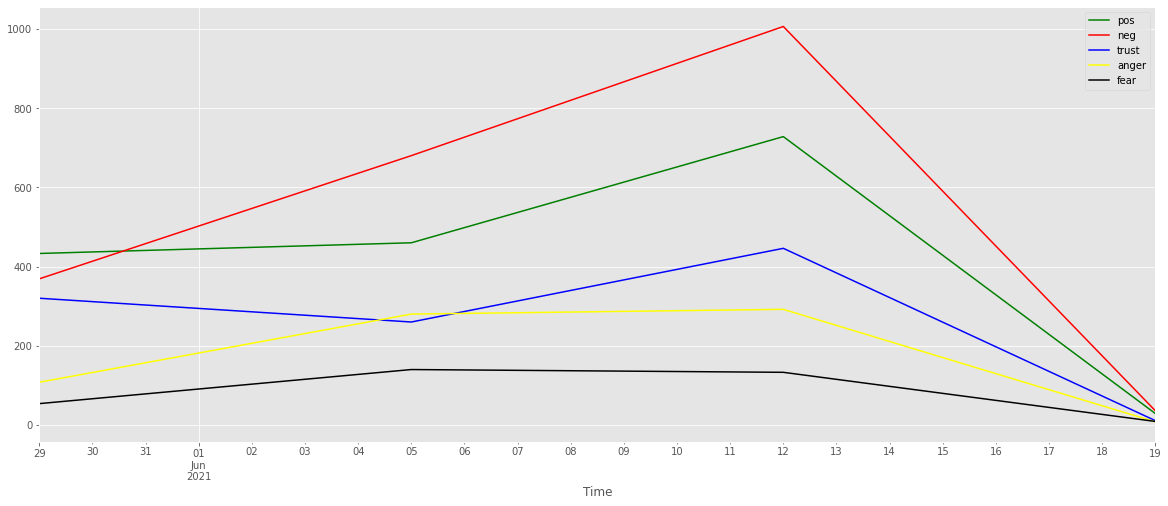

In [35]:
ax = df_new['positivity'].resample('7d').sum().plot(figsize=(16,4), color = 'green',label='pos', )
df_new['negative'].resample('7d').sum().plot(figsize=(20,4), ax = ax, color = 'red',label= 'neg')
df_new['trust'].resample('7d').sum().plot(figsize=(20,8), ax = ax, color = 'blue')
df_new['anger'].resample('7d').sum().plot(figsize=(20,8), ax = ax, color = 'yellow')
df_new['fear'].resample('7d').sum().plot(figsize=(20,8), ax = ax, color = 'black').legend()